2026-02-13 22:12:32.782 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:12:32.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:12:32.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:12:39.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:12:39.116 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:12:39.119 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:13:42.528 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-13 22:13:42.531 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

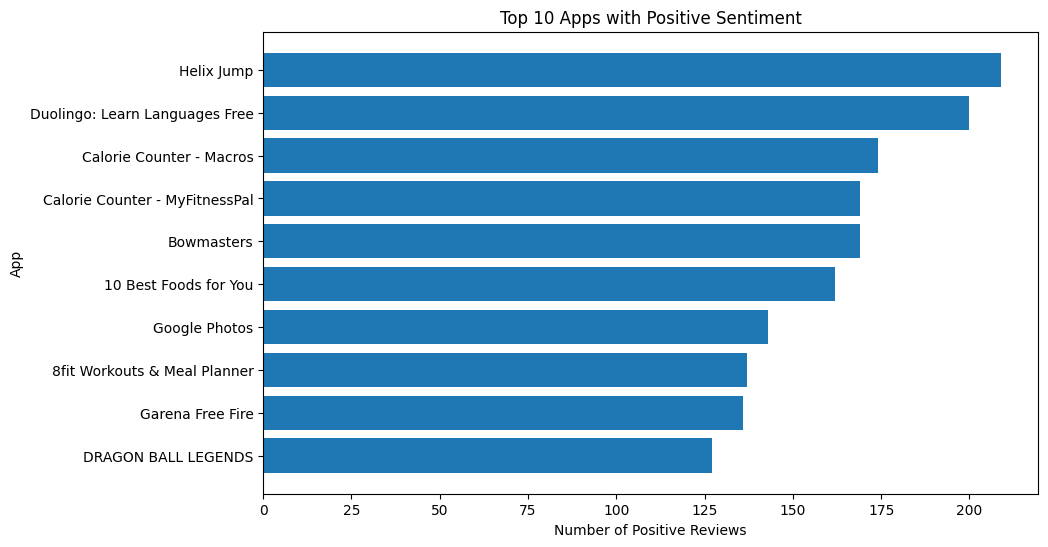

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st

# -----------------------------
# Page Title
# -----------------------------
st.title("📊 App Review Sentiment Dashboard")

# -----------------------------
# Load Data
# -----------------------------
df = pd.read_csv("googleplaystore_user_reviews.csv")

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Show columns for verification
st.subheader("📄 Columns in dataset")
st.write(df.columns.tolist())

# -----------------------------
# Required columns check
# -----------------------------
required = ['app', 'sentiment']
missing = [c for c in required if c not in df.columns]

if missing:
    st.error(f"❌ Missing columns: {missing}")
    st.stop()

# -----------------------------
# Clean data
# -----------------------------
df = df.dropna(subset=['app', 'sentiment'])

# -----------------------------
# Count positive sentiments
# -----------------------------
positive_reviews = (
    df[df['sentiment'].str.lower() == 'positive']
    .groupby('app')
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# -----------------------------
# Display Graph
# -----------------------------
if positive_reviews.empty:
    st.warning("⚠️ No positive sentiment data available.")
else:
    st.subheader("📊 Top 10 Apps by Positive Reviews")

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.barh(positive_reviews.index, positive_reviews.values)
    ax.set_xlabel("Number of Positive Reviews")
    ax.set_ylabel("App")
    ax.set_title("Top 10 Apps with Positive Sentiment")
    ax.invert_yaxis()  # Highest value on top

    st.pyplot(fig)